<a href="https://colab.research.google.com/github/Mushfiq12696/Deep_learning_project/blob/main/Influenza_A_Protein_SequenceClustering_By_DEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sgt

In [ ]:
pip install pandarallel

In [ ]:
import sgt
sgt.__version__
from sgt import SGT

In [ ]:
import pandarallel  # required library for multiprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import matplotlib as mpl
import itertools
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/New_PProtein4.csv')

In [ ]:
df[['Accession','Host','SubType','P_Name']] = df.Properties.str.split(" ", expand = True)

In [ ]:
df.head()

In [ ]:
new_data = df.drop(['Properties','Accession','Host','P_Name',],axis =1)
new_data.head()

In [ ]:
subtype = df[["SubType"]]

In [ ]:
options = ['H1N1','H3N2']
df_filtered = new_data[new_data['SubType'].isin(options)]
df_filtered

In [ ]:
new_data = df_filtered
new_data

In [ ]:
X = df[' Sequence']
def split(word):
  return [char for char in word]
sequences = [split(x) for x in X]

In [ ]:
new_data = new_data.loc[:,['SubType',' Sequence']]
new_data.columns = ['id', 'sequence']
new_data['sequence'] = new_data['sequence'].map(list)
new_data

In [ ]:
y = new_data.iloc[:,0].astype('category').values
y

['H1N1', 'H1N1', 'H1N1', 'H3N2', 'H3N2', ..., 'H1N1', 'H1N1', 'H1N1', 'H1N1', 'H3N2']
Length: 4125
Categories (2, object): ['H1N1', 'H3N2']

In [ ]:
subtypes = new_data[['id']]

In [ ]:
subtypes.values

In [ ]:
new_data

Embedding Process

In [ ]:
%%time
# Compute SGT embeddings
#Applying Deep Embedding network

sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(new_data)

In [ ]:
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

In [ ]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
y = new_data.iloc[:,0].astype('category').values
X=pca.transform(sgtembedding_df)
print(np.sum(pca.explained_variance_ratio_))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.6068045549264547


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
df = pd.DataFrame(data=X, columns=['x1','x2'])
df['class'] = y
df

<Figure size 1000x1000 with 0 Axes>

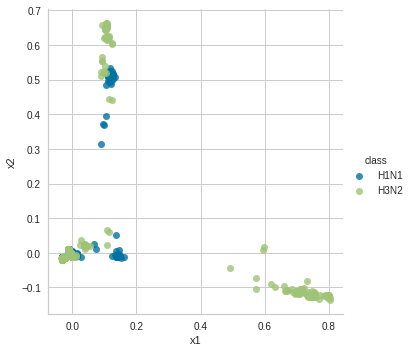

In [ ]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=df, x="x1", y="x2", fit_reg=False, hue='class')
plt.show()

In [ ]:
X.shape

(4125, 2)

In [ ]:
X

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
labels = kmeans.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


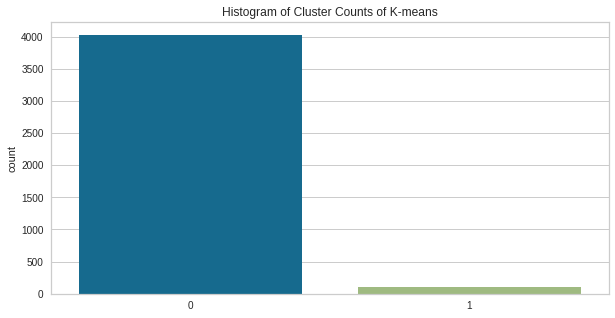

In [ ]:
ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(labels)
title="Histogram of Cluster Counts of K-means"
ax.set_title(title, fontsize=12)
plt.show()

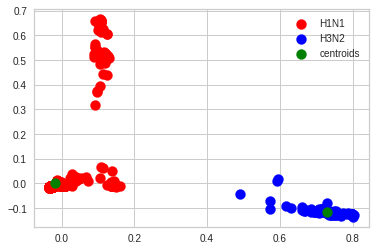

In [ ]:
plt.scatter(X[labels==0,0],X[labels==0,1], s = 100, c = 'red', label = 'H1N1')
plt.scatter(X[labels==1,0],X[labels==1,1], s = 100, c = 'blue', label = 'H3N2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'green', label = 'centroids')

plt.legend()

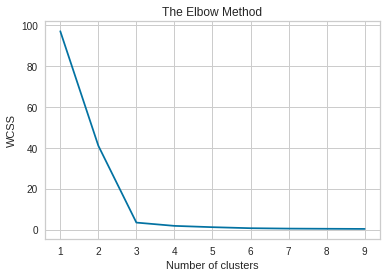

In [ ]:
#Using the elbow method to find the optimum number of cluster

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

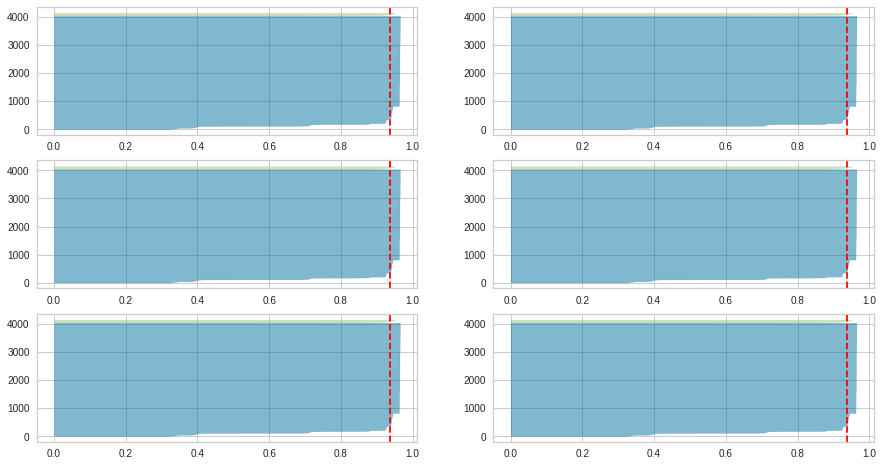

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

